In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier,plot_tree


Data set taken from google advanced data analytics course


We are building a supervised classification model Decision Tree to classify customers as satisfied or not with respect to a airline travel experience

In [76]:
df=pd.read_csv('Invistico_Airline.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [78]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [79]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [80]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(0)

In [81]:
df.duplicated().sum()

0

In [82]:
df.describe(include='object')

,satisfaction,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,Loyal Customer,Business travel,Business
freq,71087,106100,89693,62160


In [83]:
df.Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [84]:
df.Class=df.Class.map({'Eco':1,'Eco Plus':2,'Business':3})

In [85]:
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [86]:
df['satisfaction']=df['satisfaction'].map({'satisfied':1,'dissatisfied':0})

In [87]:
df=pd.get_dummies(df,drop_first=True)

In [88]:
X=df.drop(['satisfaction'],axis=1)

In [89]:
Y=df['satisfaction']

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [92]:
dt=DecisionTreeClassifier(random_state=0)

In [94]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [96]:
dt_pred=dt.predict(X_test)

In [97]:
accuracy_score(y_test,dt_pred)

0.9348013550970127

In [99]:
precision_score(y_test,dt_pred)

0.9395429401575683

In [100]:
recall_score(y_test,dt_pred)

0.9420168067226891

In [101]:
f1_score(y_test,dt_pred)

0.9407782471256328

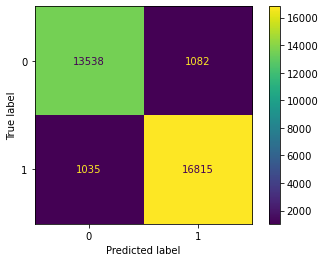

In [103]:
ConfusionMatrixDisplay(confusion_matrix(y_test,dt_pred,labels=dt.classes_),display_labels=dt.classes_).plot()
plt.show()

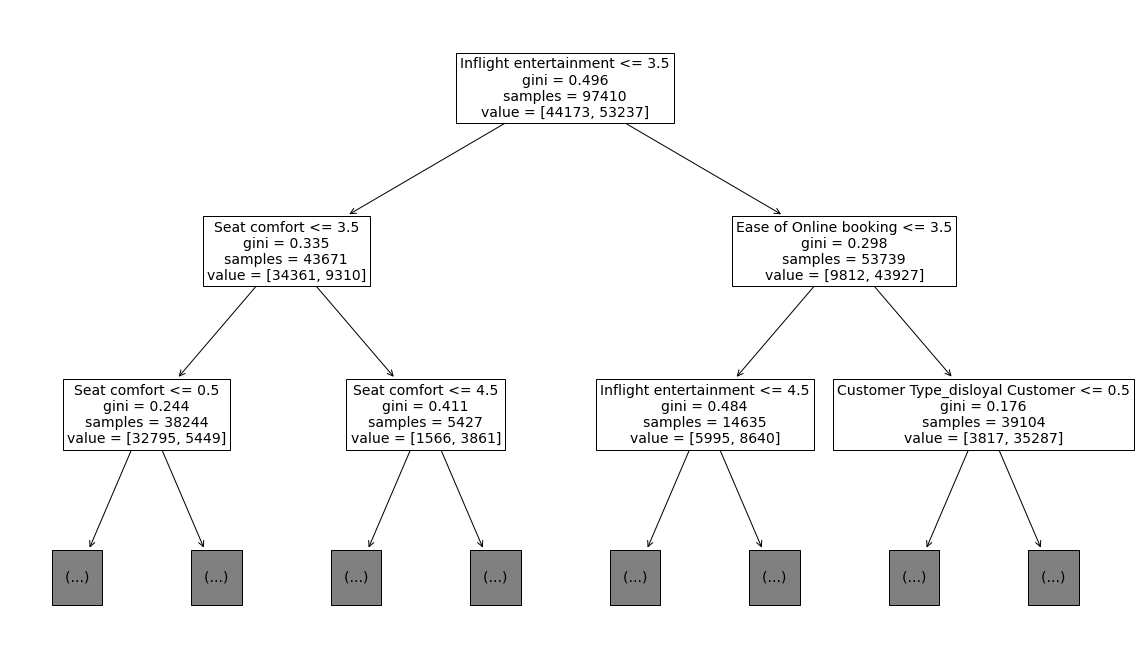

In [109]:
plt.figure(figsize=(20,12))
plot_tree(dt,max_depth=2,fontsize=14,feature_names=X.columns);#to only get tree include ;

The node at top is root node

Any node from which there are no other branchings is the leaf node or leaf nodes

The nodes in between are the decision or child nodes

left branch is for yes and right is for no

max depth is the number of levels from root node

min_samples_leaf is the minimum sample size of data that needs to be available at each node for the decision tree to proceed further without stopping

genie can be between 0 to 0.5,it tells how pure the sample is a value close to 0 means sample is very pure

Decision Trees do not need much preprocessiong

The feature which matter the most are at the top of the tree in this case they are in flight entertainment,Seat Comfort,Ease of Online Booking

Decision Tree can give great prediction for given data due to overfitting we can keep this in check with Hyperparameter tuning

Hyperparameters are aspects of a model that you set before the model is trained, and that affect how the model fits the data. They are not derived from the data itself. Hyperparameter tuning is the process of adjusting the hyperparameters to build a model that best fits the data.

GridSearch tells us the optimal max_depth and min_samples_leaf to use with model by going through all combination of max_dept and min_samples_leaf we provide and comparing them with the evaluation metric

In [117]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)
dt_tuning={'max_depth':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}
scoring={'precision','recall','accuracy','f1'}
clf1=GridSearchCV(tuned_decision_tree,dt_tuning,scoring=scoring,cv=5,refit='f1')#cv is cross validation
clf1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             refit='f1', scoring={'precision', 'accuracy', 'recall', 'f1'})

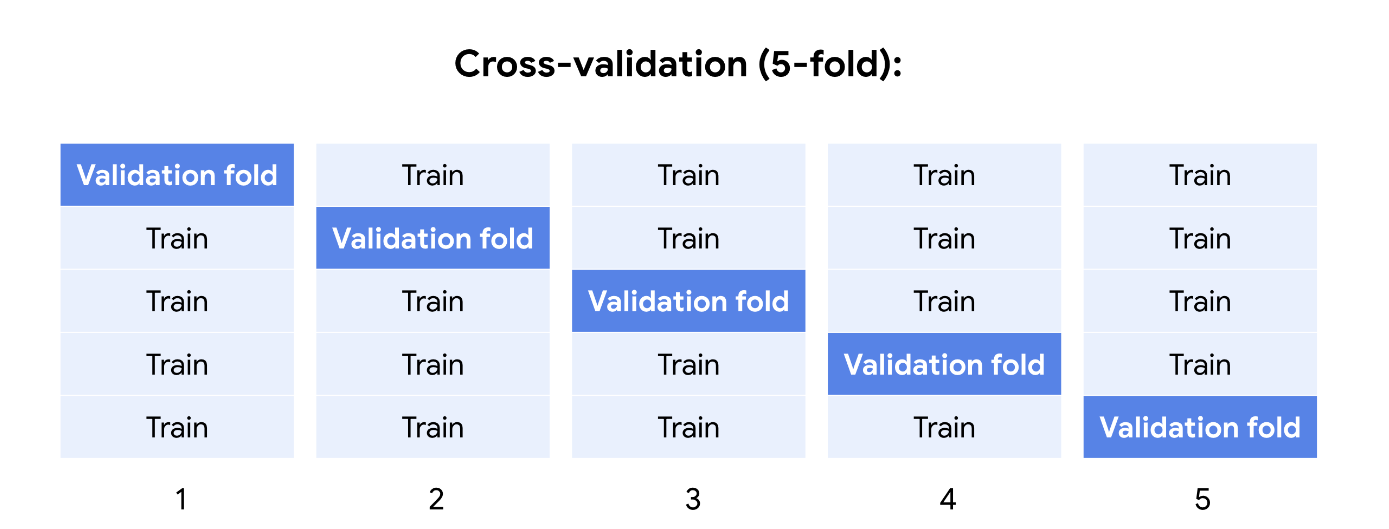

In [118]:
clf1.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=0)

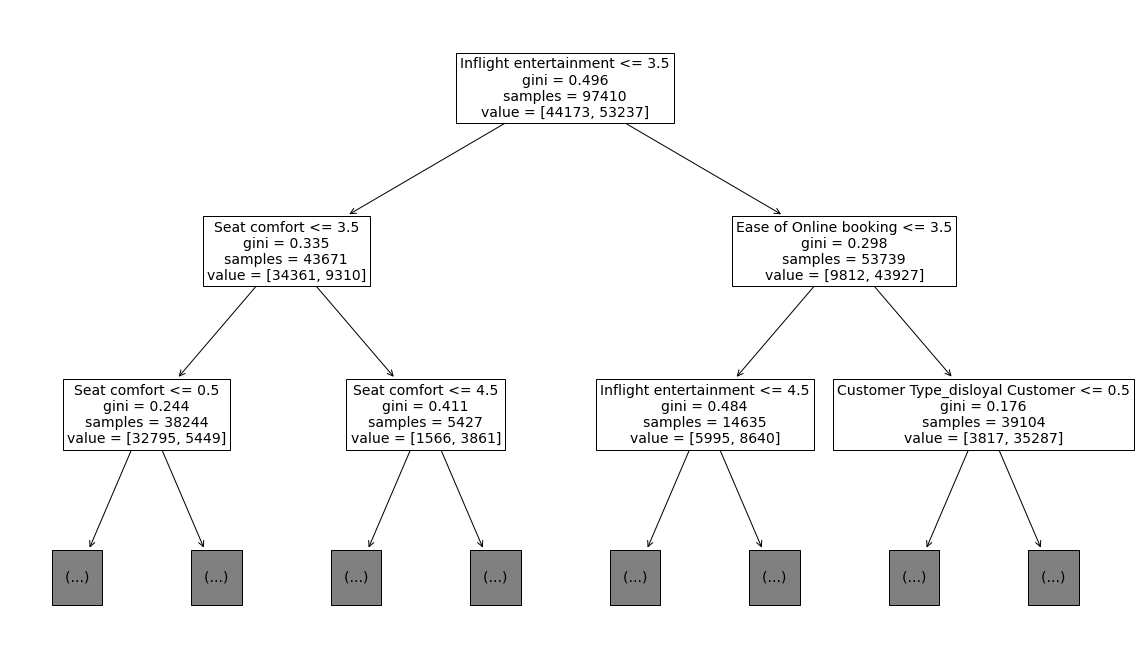

In [121]:
plt.figure(figsize=(20,12))

plot_tree(clf1.best_estimator_,max_depth=2,fontsize=14,feature_names=X.columns);

In [120]:
### YOUR CODE HERE ###

print("Best Avg. Validation Score: ", "%.4f" % clf1.best_score_)

Best Avg. Validation Score:  0.9326


In [ ]:
Conclusion

Decision trees accurately predicted satisfaction over 94 percent of the time.
The confusion matrix is useful as it shows a similar number of true positives and true negatives.
The visualization of the decision tree and the feature importance graph both suggest that 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking' are the most important features in the model.
Customer satisfaction is highly tied to 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking'. Improving these experiences should lead to better customer satisfaction.
The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction.